In [1]:
import warnings
import numpy as np 
import pandas as pd 
import seaborn as sns
from math import sqrt
from sklearn import metrics
import matplotlib.pyplot as plt 
warnings.filterwarnings('ignore')
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_csv('C:\\Users\\c2074370\\1-projects\\Phys_Descrip.txt')

In [3]:
data.drop(['Config','Ecoh','Eb','Eadh'], axis=1, inplace=True)

In [4]:

col=list(data.columns)
scaler=StandardScaler()
data[col]=scaler.fit_transform(data[col],)
data

,N,infa_C_Au,infa_S_Mg,infa_S_O,cc,cs_Mg,cs_O,ave_GCN,csDist_Mg,csDist_O,Zdist,Etot
0,-1.120510,-0.490658,-0.604262,-0.428554,-2.166638,-0.525935,-0.544286,-1.810368,-0.800705,-1.480265,-0.539189,0.986472
1,-1.120510,-0.490658,-0.604262,-0.428554,-2.166638,-0.525935,-0.544286,-1.296034,-0.430681,-0.992222,-0.539189,0.815125
2,-1.120510,-0.490658,-0.604262,-0.428554,-2.166638,-0.525935,-0.544286,-0.780585,-0.028042,-0.503121,-0.539189,0.807898
3,-1.120510,-0.824974,-0.955142,-0.428554,-2.166638,-0.705678,-0.544286,-0.266251,0.399340,-0.015079,-1.178474,0.823918
4,-1.120510,-0.824974,-0.955142,-0.428554,-2.166638,-0.705678,-0.544286,0.248083,0.843593,0.472964,-1.178474,0.842551
...,...,...,...,...,...,...,...,...,...,...,...,...
1834,4.853802,3.186821,1.851900,0.840546,3.378153,2.170204,1.276161,0.698822,0.676014,0.683637,2.397580,-5.449765
1835,4.853802,-0.824974,-0.955142,-0.428554,3.378153,-0.705678,-0.544286,1.679515,1.663493,1.660781,1.271298,-3.855746
1836,4.853802,3.186821,1.851900,4.647849,3.378153,5.225828,2.489793,0.232463,0.195771,0.195595,3.139304,-3.417365
1837,4.853802,3.186821,1.851900,0.840546,3.378153,1.810719,2.489793,0.709979,0.677139,0.683637,2.528505,-5.443844


In [5]:
X=data.iloc[:,:-1] ## independent features
y=data.iloc[:,-1] ## dependent features

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [7]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

### Model Evaluation 

In [8]:
regressor.coef_

array([-1.14379452e+00, -6.22810367e-02, -8.53577758e-02,  1.70993977e-01,
        1.73929622e-01,  1.21881213e-01,  8.38840144e-02, -2.31127381e-01,
        3.31673858e-01, -6.63131889e-02, -2.56385585e-04])

In [9]:
regressor.intercept_

0.003399726843992746

In [10]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_train, y_train)))

Coefficient of determination R^2 <-- on train set: 0.8797500462612352


In [11]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_test, y_test)))

Coefficient of determination R^2 <-- on train set: 0.8583110286281375


In [12]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(regressor,X,y,cv=5)

In [13]:
score.mean()

-0.04860143048299766

In [14]:
coeff_df = pd.DataFrame(regressor.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
N,-1.143795
infa_C_Au,-0.062281
infa_S_Mg,-0.085358
infa_S_O,0.170994
cc,0.173930
cs_Mg,0.121881
cs_O,0.083884
ave_GCN,-0.231127
csDist_Mg,0.331674
csDist_O,-0.066313


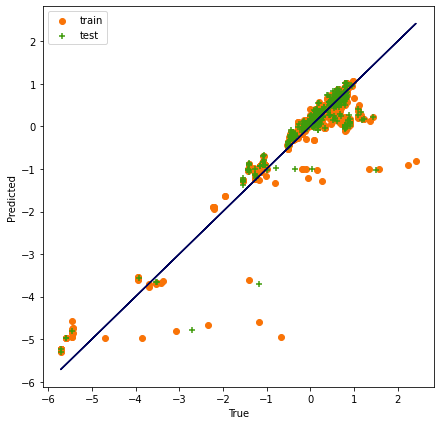

In [15]:
prediction_test=regressor.predict(X_test)
prediction_train=regressor.predict(X_train)

plt.figure(figsize=(7,7))
plt.scatter(y_train,prediction_train, marker='o', color='#f97306', label='train' )
plt.scatter(y_test,prediction_test, marker='+', color='#3f9b0b', label='test' )
plt.legend(loc='upper left')
plt.plot(y_train,y_train, color='#00035b')
plt.xlabel('True')
plt.ylabel('Predicted')
plt.show()

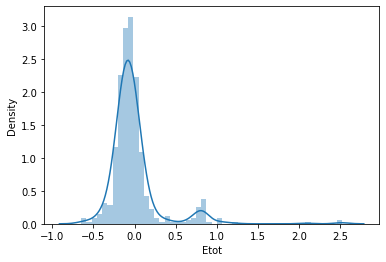

In [16]:
sns.distplot(y_test-prediction_test);

In [17]:
print('MAE:', str(round(metrics.mean_absolute_error(y_test, prediction_test),2)))
print('MSE:', str(round(metrics.mean_squared_error(y_test, prediction_test),2)))
print('RMSE:' + str(round(sqrt(metrics.mean_squared_error(y_test, prediction_test)),2)))
print('R_squared:'+ str(round(r2_score(y_test,prediction_test),2)))

MAE: 0.18
MSE: 0.1
RMSE:0.31
R_squared:0.86
